<h1 style="color:green;"><b> Ashray Kothari </b></h1>

<h3 style="color:red"> <b>The Sparks Foundation</b> : Data Science and Analytics Internship </h3>
<h3 style="color:red"> <b>Batch</b> : June 2022 </h3>

<h3> <b>Task 5</b>: Perform EDA on the dataset of "Indian Premier League".</h3>

In [1]:
# Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

<h3> <b> Deliveries Dataset </h3>

In [2]:
df_deliveries = pd.read_csv('deliveries.csv')
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


<h3> <b> Matches Dataset </h3>

In [5]:
df_matches = pd.read_csv('matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


<h3> <b> Merged Dataset </h3>

In [8]:
df = df_deliveries.merge(df_matches[['id', 'season', 'winner']], left_on = 'match_id', right_on='id', how='inner')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


<h2><b> Exploratory Data Analysis </b></h2>

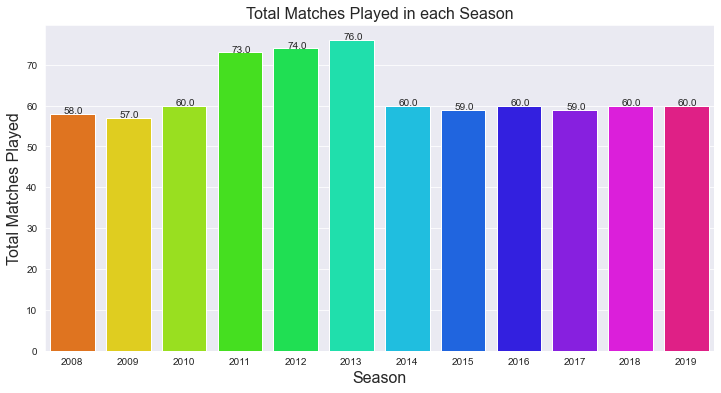

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
ax = sns.countplot(x='season', data=df_matches, palette='hsv')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))
plt.xlabel('Season', fontsize=16)
plt.ylabel('Total Matches Played', fontsize=16)
plt.title('Total Matches Played in each Season', fontsize=16)
plt.show()

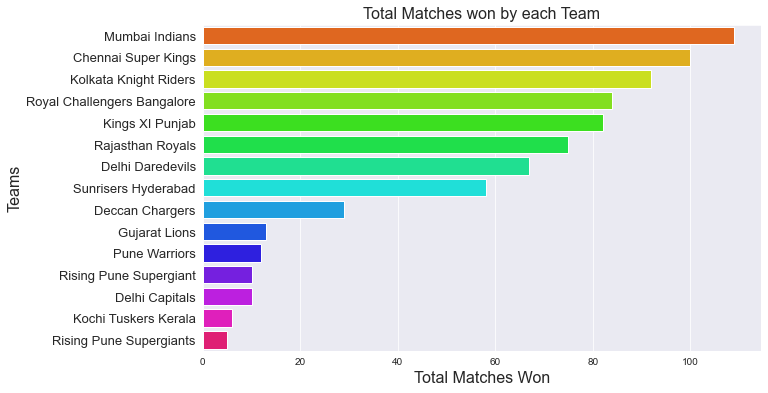

In [10]:
data = df_matches.winner.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(y = data.index, x = data, orient='h', palette='hsv')
plt.ylabel('Teams', fontsize=16)
plt.xlabel('Total Matches Won', fontsize=16)
plt.title('Total Matches won by each Team', fontsize=16)
plt.yticks(fontsize=13)
plt.show()

<p><b> Mumbai Indians have won maximum number of matches. </b></p> 

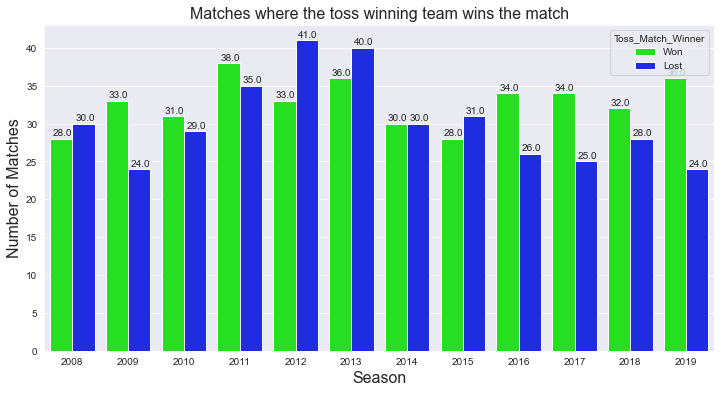

In [11]:
df_matches['Toss_Match_Winner'] = np.where(df_matches['toss_winner'] == df_matches['winner'],'Won','Lost')
plt.figure(figsize=(12,6))
ax = sns.countplot(x='season', hue=df_matches['Toss_Match_Winner'], hue_order= ['Won', 'Lost'], data=df_matches, palette='hsv')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.4))
plt.xlabel('Season', fontsize=16)
plt.ylabel('Number of Matches', fontsize=16)
plt.title('Matches where the toss winning team wins the match', fontsize=16)
plt.show()

<p><b> In recent Seasons, winning the toss has proven to beneficial to the teams. </b></p> 

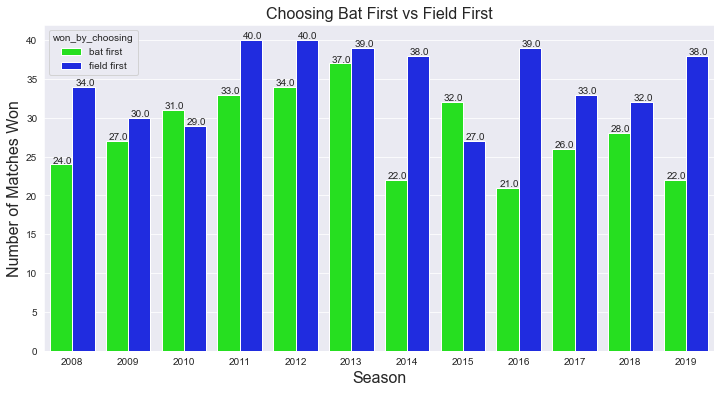

In [12]:
df_matches['won_by_choosing'] = np.where(df_matches['win_by_runs'] > 0, 'bat first', 'field first')
plt.figure(figsize=(12,6))
ax = sns.countplot(x='season', hue=df_matches['won_by_choosing'], hue_order= ['bat first', 'field first'], data=df_matches, palette='hsv')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.2))
plt.xlabel('Season', fontsize=16)
plt.ylabel('Number of Matches Won', fontsize=16)
plt.title('Choosing Bat First vs Field First', fontsize=16)
plt.show()

<p><b> Teams choosing fielding first have won more number of matches. </b></p>

In [13]:
# number of matches won by each team in each season
with pd.option_context('display.max_rows',None):
    print(df_matches.groupby('season')['winner'].value_counts())

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

In [14]:
# Most Player of the Match award Winners
df_matches['player_of_match'].value_counts()[:10]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

<h3><b> Batting Statistics </b></h3>

In [15]:
# Top 10 Run Scorers
most_runs_batsman = df_deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
most_runs_batsman[:10]

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

In [16]:
# Highest Run Scorer in each season
most_runs_batsman_season = df.groupby(['season', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False)
most_runs_batsman_season = most_runs_batsman_season.to_frame().reset_index()
most_runs_batsman_season.drop_duplicates(['season'], keep='first', inplace=True)
most_runs_batsman_season.sort_values('season').reset_index().drop('index', axis=1)

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


In [17]:
df_tmp = df_deliveries.copy()
df_tmp['teams'] = df_tmp['batting_team'] + ' vs ' + df_tmp['bowling_team']

In [18]:
# Highest Individual Scores
most_runs_batsman_match = df_tmp.groupby(['match_id', 'teams', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False)
most_runs_batsman_match.to_frame().reset_index()[:10]

,match_id,teams,batsman,batsman_runs
0,411,Royal Challengers Bangalore vs Pune Warriors,CH Gayle,175
1,60,Kolkata Knight Riders vs Royal Challengers Ban...,BB McCullum,158
2,562,Royal Challengers Bangalore vs Mumbai Indians,AB de Villiers,133
3,7935,Delhi Daredevils vs Sunrisers Hyderabad,RR Pant,130
4,620,Royal Challengers Bangalore vs Gujarat Lions,AB de Villiers,129
5,372,Royal Challengers Bangalore vs Delhi Daredevils,CH Gayle,128
6,206,Chennai Super Kings vs Rajasthan Royals,M Vijay,127
7,36,Sunrisers Hyderabad vs Kolkata Knight Riders,DA Warner,126
8,516,Kings XI Punjab vs Chennai Super Kings,V Sehwag,122
9,7953,Chennai Super Kings vs Sunrisers Hyderabad,SR Watson,121


In [19]:
# Batsman with maximum fours
most_fours_batsman = df_deliveries[df_deliveries['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
most_fours_batsman[:10]

batsman
S Dhawan      526
SK Raina      495
G Gambhir     492
V Kohli       482
DA Warner     459
RV Uthappa    436
RG Sharma     431
AM Rahane     405
CH Gayle      376
PA Patel      366
Name: batsman_runs, dtype: int64

In [20]:
# Batsman with maximum sixes
most_sixes_batsman = df_deliveries[df_deliveries['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
most_sixes_batsman[:10]

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman_runs, dtype: int64

In [21]:
# Match in which maximum fours were hit
most_fours_match = df_tmp[df_tmp['batsman_runs'] == 4].groupby(['match_id','teams'])['batsman_runs'].count().sort_values(ascending=False)
most_fours_match[:1]

match_id  teams                            
49        Delhi Daredevils vs Gujarat Lions    31
Name: batsman_runs, dtype: int64

In [22]:
# Match in which maximum sixes were hit
most_sixes_match = df_tmp[df_tmp['batsman_runs'] == 6].groupby(['match_id','teams'])['batsman_runs'].count().sort_values(ascending=False)
most_sixes_match[:1]

match_id  teams                                       
411       Royal Challengers Bangalore vs Pune Warriors    21
Name: batsman_runs, dtype: int64

In [23]:
# Number of fours hit by each Team
most_fours_team = df_deliveries[df_deliveries['batsman_runs'] == 4].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
most_fours_team[:10]

batting_team
Mumbai Indians                 2588
Kings XI Punjab                2458
Kolkata Knight Riders          2434
Royal Challengers Bangalore    2360
Chennai Super Kings            2193
Delhi Daredevils               2158
Rajasthan Royals               2035
Sunrisers Hyderabad            1444
Deccan Chargers                 957
Pune Warriors                   525
Name: batsman_runs, dtype: int64

In [24]:
# Number of sixes hit by each Team
most_sixes_team = df_deliveries[df_deliveries['batsman_runs'] == 6].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
most_sixes_team[:10]

batting_team
Royal Challengers Bangalore    1132
Mumbai Indians                 1096
Kings XI Punjab                 976
Chennai Super Kings             973
Kolkata Knight Riders           930
Delhi Daredevils                801
Rajasthan Royals                681
Sunrisers Hyderabad             533
Deccan Chargers                 400
Pune Warriors                   196
Name: batsman_runs, dtype: int64

In [25]:
# Number of fours hit in each season
fours_season = df[df['batsman_runs'] == 4].groupby('season')['batsman_runs'].count().sort_values(ascending=False)
fours_season

season
2013    2054
2011    1916
2012    1911
2010    1709
2008    1703
2019    1685
2018    1674
2016    1633
2017    1612
2015    1611
2014    1563
2009    1321
Name: batsman_runs, dtype: int64

In [26]:
# Number of sixes hit in each season
fours_season = df[df['batsman_runs'] == 6].groupby('season')['batsman_runs'].count().sort_values(ascending=False)
fours_season

season
2018    869
2019    778
2012    733
2014    715
2017    706
2015    692
2013    681
2016    639
2011    639
2008    623
2010    587
2009    508
Name: batsman_runs, dtype: int64

In [27]:
# Batsman who has had maximum dismissals
most_dismissal_batsman = df_deliveries[df_deliveries['dismissal_kind'].notnull()]['batsman'].value_counts()
most_dismissal_batsman[:10]

RG Sharma     162
SK Raina      161
RV Uthappa    157
V Kohli       152
KD Karthik    140
S Dhawan      137
G Gambhir     135
PA Patel      127
MS Dhoni      118
AM Rahane     117
Name: batsman, dtype: int64

<h3><b> Bowling & Fielding Statistics </b></h3>

In [28]:
# Number of wickets in each season
most_wickets_season = df[df['player_dismissed'].notnull()]['season'].value_counts()
most_wickets_season

2013    912
2012    858
2011    813
2010    725
2018    719
2017    711
2009    698
2015    691
2008    690
2019    677
2014    674
2016    666
Name: season, dtype: int64

In [29]:
# Bowlers with maximum wickets
most_wickets_bowlers = df[df['player_dismissed'].notnull()]['bowler'].value_counts()
most_wickets_bowlers[:10]

SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
B Kumar            141
R Ashwin           138
SP Narine          137
UT Yadav           136
R Vinay Kumar      127
Name: bowler, dtype: int64

In [30]:
# Various kinds of dismissals occured
dismissal_kinds = df_deliveries[df_deliveries['dismissal_kind'].notnull()]['dismissal_kind'].value_counts()
dismissal_kinds

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [31]:
# Player with maximum number of catches
most_catches_fielders = df_deliveries[df_deliveries['dismissal_kind'] == 'caught']['fielder'].value_counts()
most_catches_fielders[:10]

KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          82
KA Pollard         76
V Kohli            73
PA Patel           69
S Dhawan           68
Name: fielder, dtype: int64

In [32]:
# Player who has made maximum number of runouts
most_runouts_fielders = df_deliveries[df_deliveries['dismissal_kind'] == 'run out']['fielder'].value_counts()
most_runouts_fielders[:10]

MS Dhoni          23
RA Jadeja         20
V Kohli           17
SK Raina          16
AB de Villiers    14
MK Pandey         14
KD Karthik        14
PA Patel          12
DJ Bravo          12
YK Pathan         10
Name: fielder, dtype: int64

In [33]:
# Bowler who has taken maximum caught and bowled wickets
most_bowl_and_catch_bowlers = df_deliveries[df_deliveries['dismissal_kind'] == 'caught and bowled']['bowler'].value_counts()
most_bowl_and_catch_bowlers[:10]

Harbhajan Singh    10
DJ Bravo            8
SP Narine           7
KA Pollard          6
SK Warne            5
A Chandila          5
SL Malinga          5
B Kumar             5
PP Chawla           4
R Vinay Kumar       4
Name: bowler, dtype: int64

In [34]:
# Player with maximum number of stumpings
most_stumpings_fielders = df_deliveries[df_deliveries['dismissal_kind'] == 'stumped']['fielder'].value_counts()
most_stumpings_fielders[:10]

MS Dhoni         38
RV Uthappa       32
KD Karthik       29
WP Saha          18
AC Gilchrist     16
PA Patel         16
NV Ojha          10
RR Pant           9
KC Sangakkara     9
Q de Kock         8
Name: fielder, dtype: int64

In [35]:
# Bowler who has thrown maximum number of wides
most_wides_bowlers = df_deliveries[df_deliveries['wide_runs'] > 0]['bowler'].value_counts()
most_wides_bowlers[:10]

SL Malinga     129
DJ Bravo       119
P Kumar        112
UT Yadav        98
SR Watson       95
R Ashwin        89
DW Steyn        88
B Kumar         87
RP Singh        86
DS Kulkarni     78
Name: bowler, dtype: int64

In [36]:
# Bowler who has thrown maximum number of no-balls
most_noballs_bowlers = df_deliveries[df_deliveries['noball_runs'] > 0]['bowler'].value_counts()
most_noballs_bowlers[:10]

S Sreesanth    23
JJ Bumrah      22
I Sharma       21
A Mishra       20
UT Yadav       18
SL Malinga     18
AB Dinda       14
JA Morkel      13
M Morkel       13
B Lee          13
Name: bowler, dtype: int64

<h3><b> Statistics for Final Matches </b></h3>

In [37]:
final_matches = df_matches.drop_duplicates(['season'], keep='last').sort_values('season')
final_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Toss_Match_Winner,won_by_choosing
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN,Won,field first
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,Lost,bat first
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,Won,bat first
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN,Won,bat first
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN,Lost,field first
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN,Won,bat first
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,Won,field first
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN,Lost,bat first
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,Won,bat first
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN,Won,bat first


In [38]:
# Winner Team in each Season
final_matches[['season', 'winner']].reset_index().drop(['index'],axis=1)

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [39]:
# Team with maximum titles won
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

<p><b> Mumbai Indians have won maximum number of titles - 4 (till 2019). </b></p>

In [40]:
won_by_choosing = final_matches['won_by_choosing'].value_counts()
won_by_choosing

bat first      8
field first    4
Name: won_by_choosing, dtype: int64

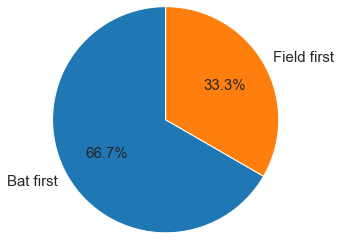

In [41]:
plt.pie(won_by_choosing, labels=['Bat first', 'Field first'], startangle=90, autopct='%.1f%%', radius=1.3, textprops={'fontsize':15})
plt.show()

<p><b> In Final Matches, teams batting first have won more number of matches. </b></p>

<h2><b> Observations </b></h2>

Most Successful Team in IPL - Mumbai Indians (4 Titles till 2019) <br> <br>
Batsman with most runs in IPL - V Kohli (5434 runs) <br>
Batsman with highest individual score - CH Gayle (175 runs) <br>
Batsman with most number of Player of the Match Award in IPL - CH Gayle (21) <br> <br>
Bowler with most wickets in IPL - SL Malinga (188) <br>
Most stumpings in IPL - MS Dhoni (38) <br>
Fielder with most runouts in IPL - MS Dhoni (23) <br>
Fielder with most catches in IPL - KD Karthik (109) <br>